<a href="https://colab.research.google.com/github/ayesha-119/Deep-Learning-BWF/blob/master/Task_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🔴 Task 17**

**Topics: KNN Classifier Using Scikit-Learn**

Resource: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

We will be using the following dataset for classification

**Adult Census Income dataset:** The Adult Census Income dataset is a binary classification dataset that contains demographic information about individuals, such as age, education, and occupation, along with their income level. The goal is to predict whether an individual's income is above or below $50,000 per year.

**Downloading the Dataset**

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url, header=None, delimiter=', ', engine='python')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Exploratory Data Analysis**

In [106]:
df.shape

(32561, 15)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [108]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**renaming coulmn names:**

In [109]:
# Define new column names
new_columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
               'marital_status', 'occupation', 'relationship', 'race', 
               'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 
               'income']

# Rename columns
df.columns = new_columns

# Print first five rows of the updated DataFrame
print(df.head())

   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

**Checking null values in data**

In [110]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [112]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [113]:
# view frequency distribution of values in `income` variable

df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [114]:
import numpy as np
# Calculate percentage frequency distribution of values in `income` variable
income_freq = df['income'].value_counts(normalize=True) * 100
print(income_freq)

<=50K    75.919044
>50K     24.080956
Name: income, dtype: float64


**Data Visualization:**

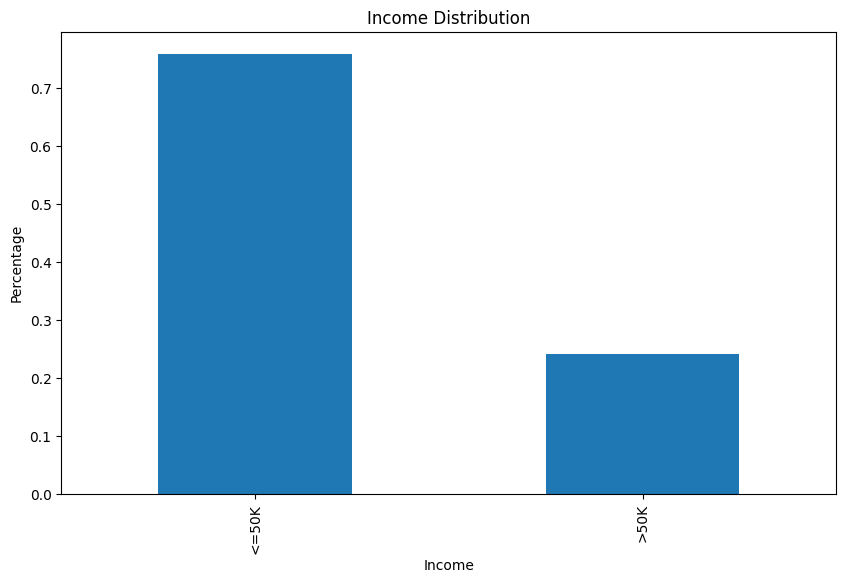

In [115]:
# plot bar chart
plt.figure(figsize=(10, 6))
df['income'].value_counts(normalize=True).plot(kind='bar')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Percentage')
plt.show()



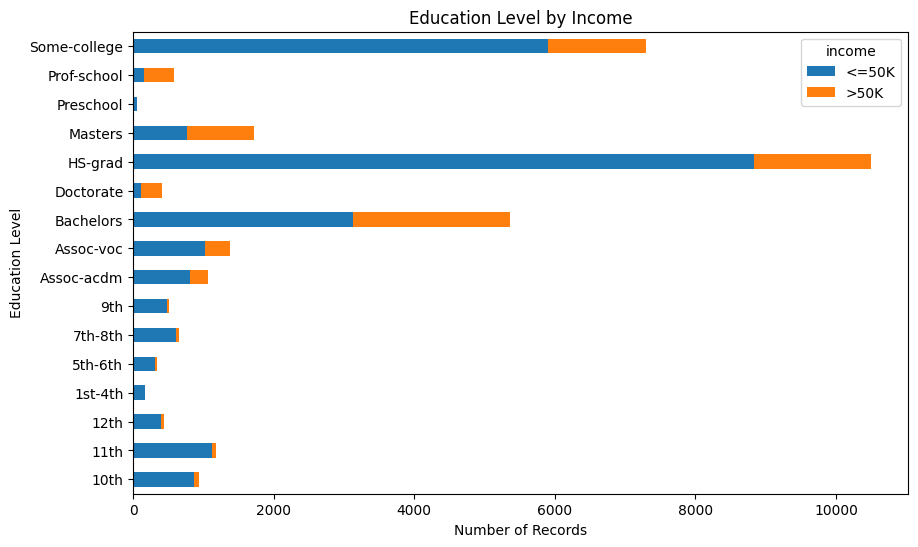

In [116]:
# Visualize education level by income
income_by_education = df.groupby(['income', 'education'])['education'].count().unstack('income')
fig, ax = plt.subplots(figsize=(10, 6))
income_by_education.plot(kind='barh', stacked=True, ax=ax)
ax.set_title('Education Level by Income')
ax.set_xlabel('Number of Records')
ax.set_ylabel('Education Level')
plt.show()

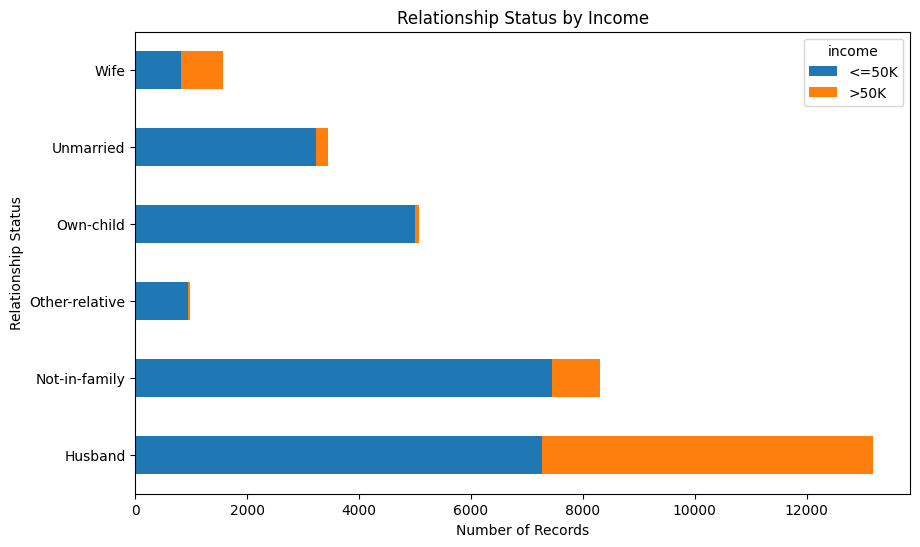

In [117]:
# Visualize relationship status by income
income_by_relationship = df.groupby(['income', 'relationship'])['relationship'].count().unstack('income')
fig, ax = plt.subplots(figsize=(10, 6))
income_by_relationship.plot(kind='barh', stacked=True, ax=ax)
ax.set_title('Relationship Status by Income')
ax.set_xlabel('Number of Records')
ax.set_ylabel('Relationship Status')
plt.show()

**Estimating correlation coefficients:**

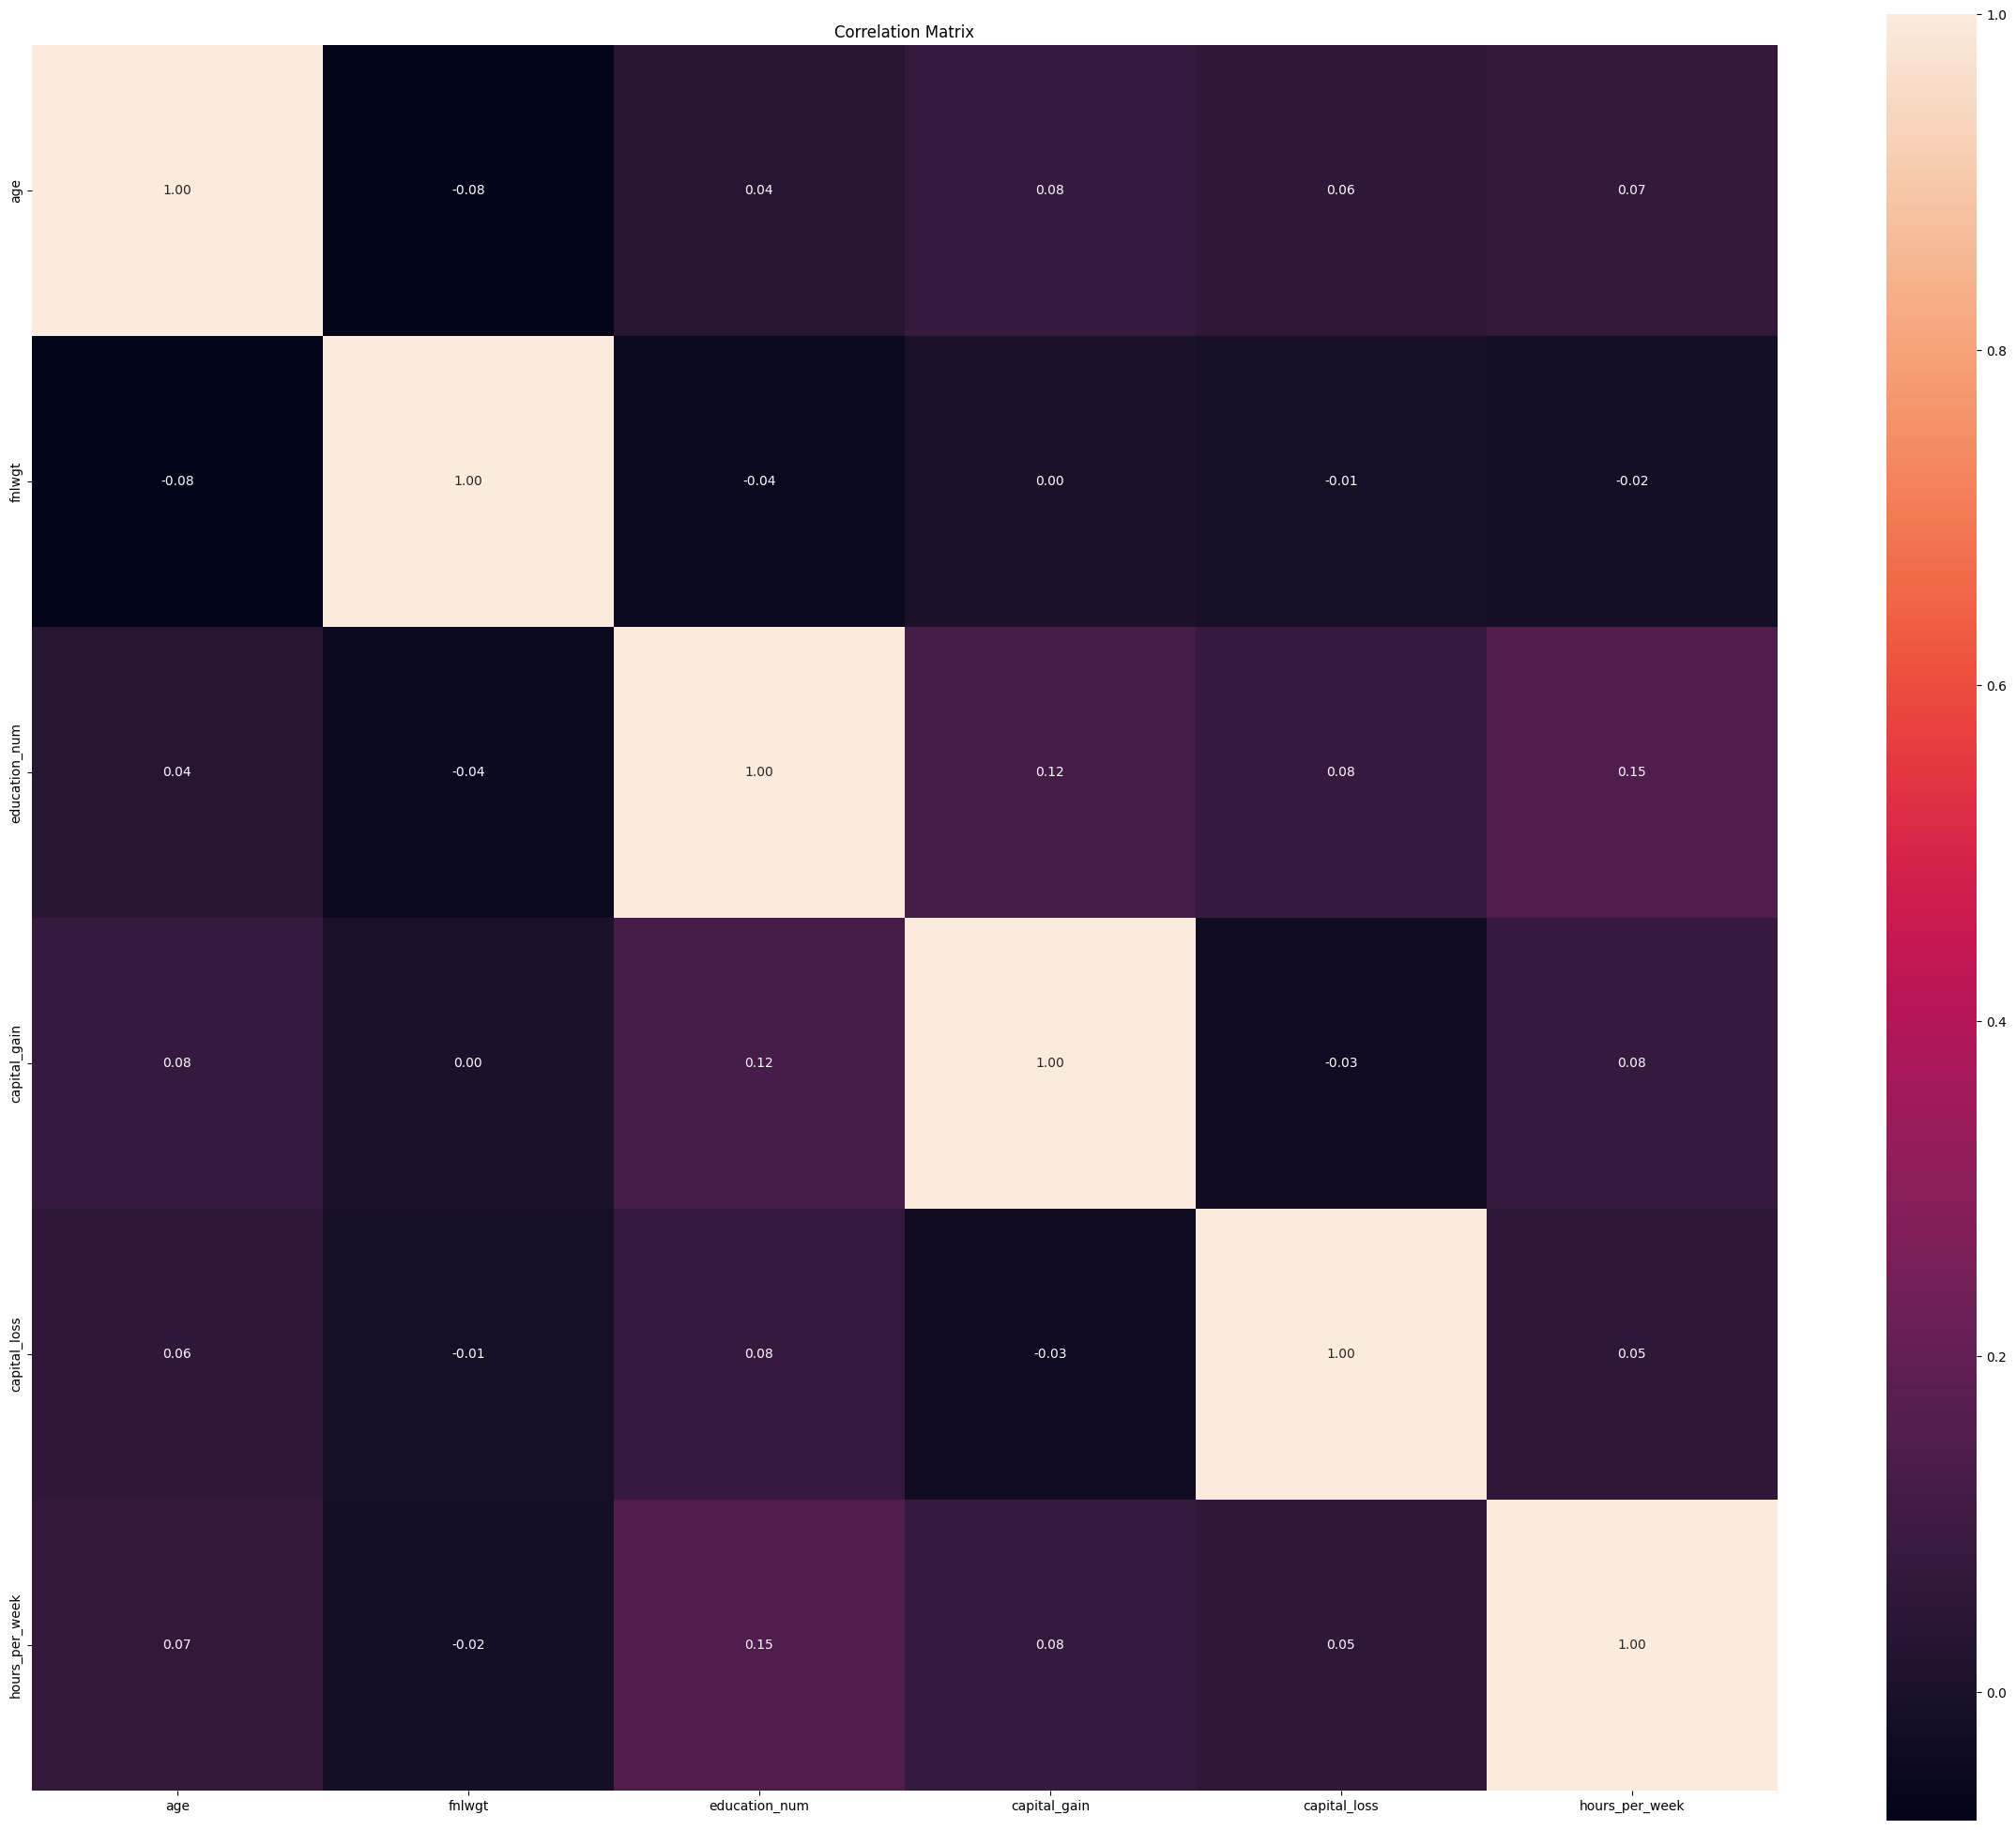

In [118]:
import seaborn as sns

# Select numeric columns
numeric_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Compute correlation coefficients
corr = df[numeric_cols].corr()

# Create heatmap
sns.heatmap(corr, square=True, annot=True, fmt='.2f', linecolor='white')
plt.title('Correlation Matrix')
plt.show()

**Handling categorical variables:**

In [137]:
# transform categorical variables
categorical = ['workclass', 'education', 'marital_status', 'occupation', 'relationship',
               'race', 'sex', 'native_country']

df_encoded = pd.get_dummies(df, columns=categorical)

**Declare feature vector and target variable**

In [133]:
# split data into train and test sets
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']


**Split data into training and testing sets**

In [138]:
# split data into train and test sets
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Feature Scaling **

In [143]:
cols = X_train.columns

In [144]:
from sklearn.preprocessing import StandardScaler
stan_scaler = StandardScaler()
X_train = stan_scaler.fit_transform(X_train)
X_test = stan_scaler.fit_transform(X_test)

# **Fit K Neighbours Classifier to the training set**

In [151]:
from sklearn.neighbors import KNeighborsClassifier


# instantiate KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

**Predict test-set results**

In [149]:
# make predictions on the test set
y_pred = knn.predict(X_test)
y_pred

array([' <=50K', ' >50K', ' >50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype=object)

**Check accuracy score**

In [150]:
# print the accuracy score
print('Accuracy:', knn.score(X_test, y_test))

Accuracy: 0.8235836020267158


**Check for overfitting and underfitting**

In [152]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.8939
Test set score: 0.8145


# **Rebuild kNN Classification model using different values of k**

In [161]:
# Rebuild the kNN model with different values of k
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,11)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

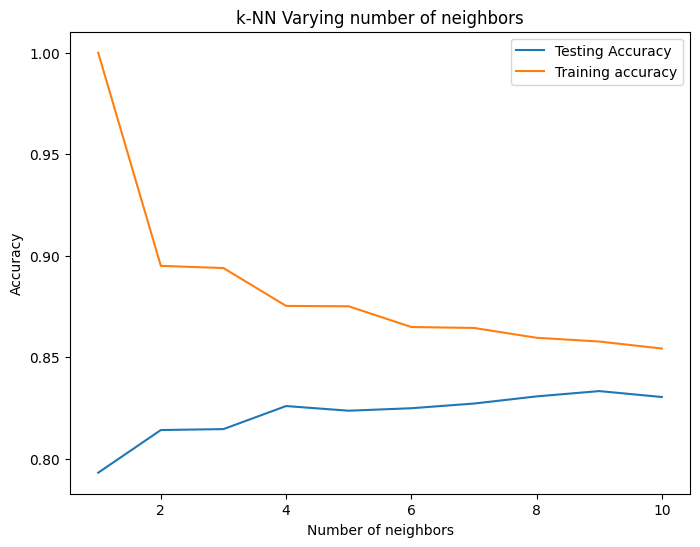

In [162]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('k-NN Varying number of neighbors')
ax.plot(neighbors, test_accuracy, label='Testing Accuracy')
ax.plot(neighbors, train_accuracy, label='Training accuracy')
ax.legend()
ax.set_xlabel('Number of neighbors')
ax.set_ylabel('Accuracy')
plt.show()

We can observe above that we get maximum testing accuracy for k=9. So lets create a KNeighborsClassifier with number of neighbors as 9.

In [163]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.833256563795486

In [ ]:
y_pred = knn.predict(X_test)

**Confusion Matrix:**

In [166]:
from sklearn.metrics import confusion_matrix
# compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4468  474]
 [ 675  896]]


**Classification Report:**

In [169]:
# compute classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.89      4942
        >50K       0.65      0.57      0.61      1571

    accuracy                           0.82      6513
   macro avg       0.76      0.74      0.75      6513
weighted avg       0.82      0.82      0.82      6513



**Hyperparameter tuning:**

In [174]:
from sklearn.model_selection import GridSearchCV

# define the parameter grid
param_grid = {'n_neighbors': np.arange(1, 20), 'weights': ['uniform', 'distance']}

# instantiate the kNN classifier
knn = KNeighborsClassifier()

# instantiate the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# print the best accuracy score
print("Best accuracy score: ", grid_search.best_score_)


Best hyperparameters:  {'n_neighbors': 18, 'weights': 'distance'}
Best accuracy score:  0.8286241920727043
